## Description
This notebook analyzes employee data to gauge what makes them leave the company.
Based on the finding of the analysis, to propose solutions to reduce the employee turnover.
The Powerpoint slide summarize the findings and provide recommendations to the management.


## The HR dataset

Source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset


In [47]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# For saving models
import pickle


In [48]:
# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

In [49]:
# Gather basic information about the data
print("Dataset info:")
print(df0.info())
print("\nDataset shape:", df0.shape)
print("\nColumn names:", df0.columns.tolist())
print("\nData types:\n", df0.dtypes)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Dataset shape: (14999, 10)

Column names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_l

### Gather descriptive statistics about the data

In [50]:
# Gather descriptive statistics about the data
print("Descriptive statistics:")
print(df0.describe())

# Get unique values in categorical columns 
print("\nUnique values in 'department':", df0['Department'].unique())
print("Unique values in 'salary':", df0['salary'].unique())

Descriptive statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              

### Rename columns
Standardize column names in snake_case and make the name more concise

In [51]:
# Display all column names
print("Current column names:")
print(df0.columns.tolist())

Current column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [52]:
# Rename columns as needed
df = df0.copy()
df.columns = df.columns.str.lower()
df = df.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'left': 'left_company'
})

# Display all column names after the update
print(df.columns.tolist())

['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'left_company', 'promotion_last_5years', 'department', 'salary']


### Check missing values

In [53]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print(df.isnull().mean() * 100)

Missing values in each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left_company             0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Percentage of missing values:
satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_monthly_hours    0.0
tenure                   0.0
work_accident            0.0
left_company             0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64


### Check duplicates

In [54]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 3008


In [55]:
# Inspect some rows containing duplicates as needed
if df.duplicated().sum() > 0:
    print("\nExample of duplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())


Example of duplicate rows:
       satisfaction_level  last_evaluation  number_project  \
30                   0.09             0.62               6   
12030                0.09             0.62               6   
14241                0.09             0.62               6   
71                   0.09             0.77               5   
12071                0.09             0.77               5   

       average_monthly_hours  tenure  work_accident  left_company  \
30                       294       4              0             1   
12030                    294       4              0             1   
14241                    294       4              0             1   
71                       275       4              0             1   
12071                    275       4              0             1   

       promotion_last_5years   department  salary  
30                         0   accounting     low  
12030                      0   accounting     low  
14241                      0

In [56]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Display first few rows of new dataframe as needed
df.head()


Shape after removing duplicates: (11991, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers
Certain types of models are more sensitive to outliers than others.

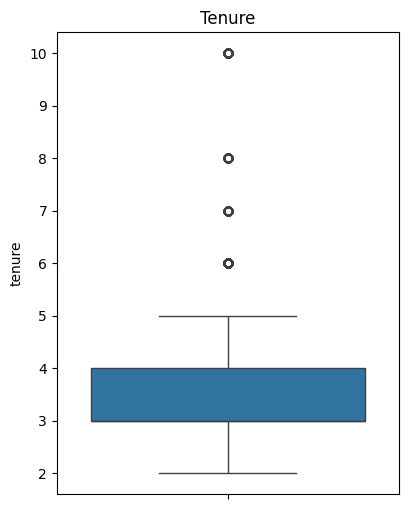

In [57]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(15, 6))
plt.subplot(131)
sns.boxplot(y=df['tenure'])
plt.title('Tenure')
plt.show()

In [58]:
# Determine the number of rows containing outliers
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']

# Calculate outliers using IQR method for numerical variables
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Calculate outliers for each numerical column
print("\nOutlier Analysis:")
for col in numerical_cols:
    n_outliers, lb, ub = get_outliers(df, col)
    print(f"\n{col}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lb:.2f}")
    print(f"Upper bound: {ub:.2f}")
    if n_outliers > 0:
        print(f"Min value: {df[col].min():.2f}")
        print(f"Max value: {df[col].max():.2f}")


Outlier Analysis:

satisfaction_level:
Number of outliers: 0
Lower bound: -0.03
Upper bound: 1.33

last_evaluation:
Number of outliers: 0
Lower bound: 0.13
Upper bound: 1.29

number_project:
Number of outliers: 0
Lower bound: 0.00
Upper bound: 8.00

average_monthly_hours:
Number of outliers: 0
Lower bound: 28.00
Upper bound: 372.00

tenure:
Number of outliers: 824
Lower bound: 1.50
Upper bound: 5.50
Min value: 2.00
Max value: 10.00


## Step 2. Data Exploration (Continue EDA)

Checking on how many employees left and what percentage of all employees this figure represents.

In [59]:
# Get numbers of people who left vs. stayed
turnover_counts = df['left_company'].value_counts()
print("Number of employees who:")
print(f"Stayed: {turnover_counts[0]}")
print(f"Left: {turnover_counts[1]}")

# Get percentages of people who left vs. stayed
turnover_pcts = df['left_company'].value_counts(normalize=True) * 100
print("\nPercentage of employees who:")
print(f"Stayed: {turnover_pcts[0]:.1f}%")
print(f"Left: {turnover_pcts[1]:.1f}%")

Number of employees who:
Stayed: 10000
Left: 1991

Percentage of employees who:
Stayed: 83.4%
Left: 16.6%


### Data visualizations

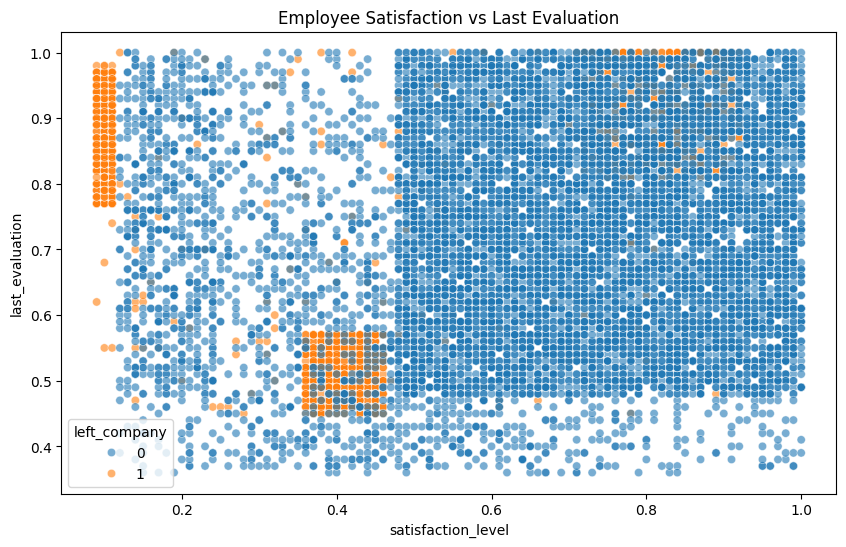

In [60]:
# Create a plot as needed
# 1. Satisfaction vs Last Evaluation, colored by turnover
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', 
                hue='left_company', alpha=0.6)
plt.title('Employee Satisfaction vs Last Evaluation')
plt.show()

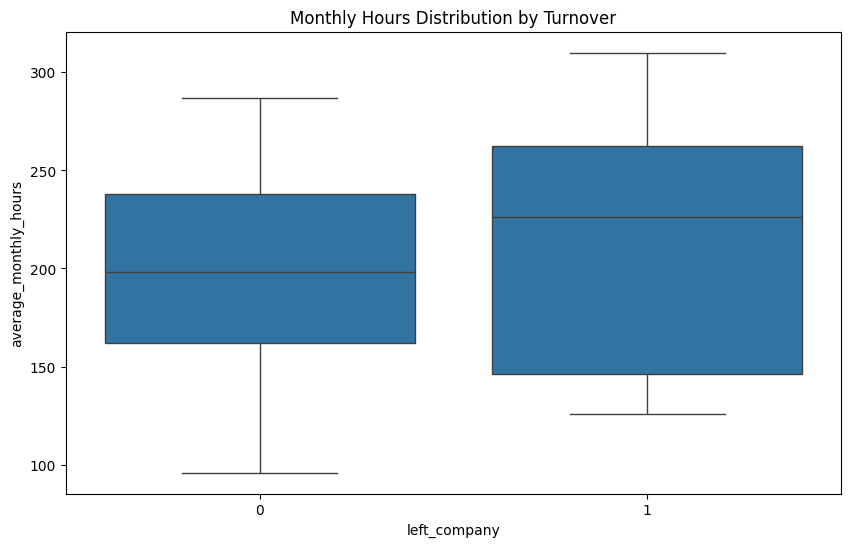

In [61]:
# Create a plot as needed
# 2. Distribution of monthly hours by turnover
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='left_company', y='average_monthly_hours')
plt.title('Monthly Hours Distribution by Turnover')
plt.show()


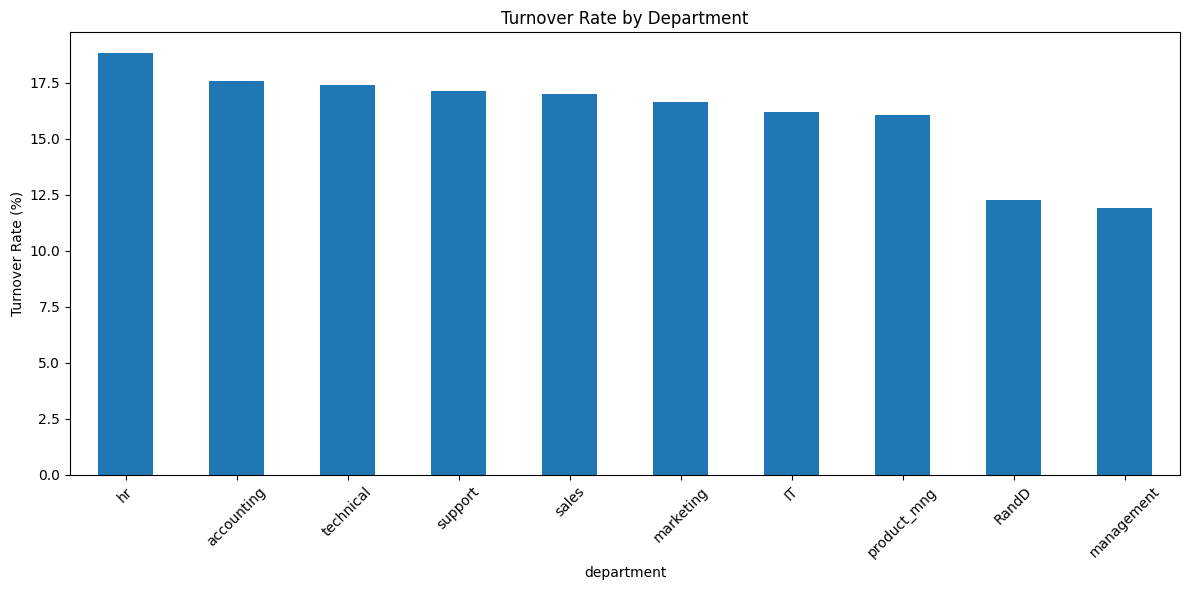

In [62]:
# Create a plot as needed
# 3. Turnover rate by department
plt.figure(figsize=(12, 6))
turnover_by_dept = df.groupby('department')['left_company'].mean() * 100
turnover_by_dept.sort_values(ascending=False).plot(kind='bar')
plt.title('Turnover Rate by Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

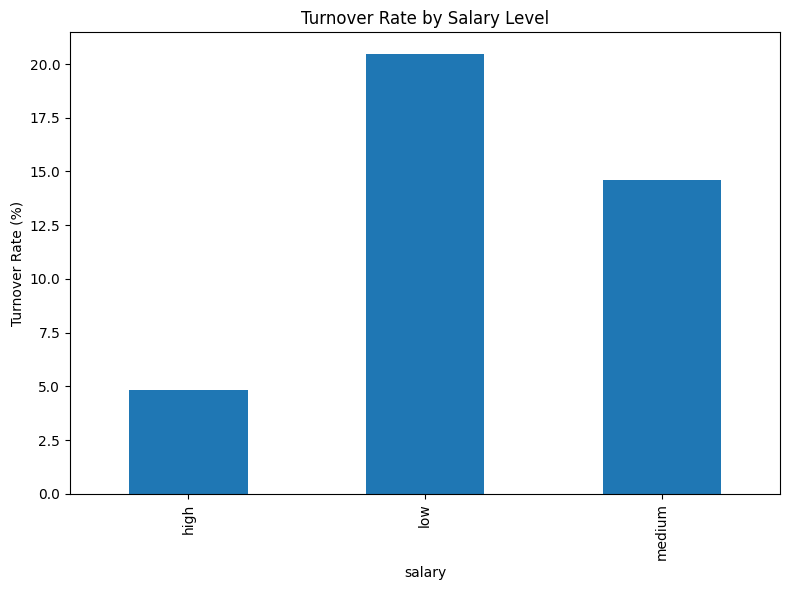

In [63]:
# Create a plot as needed
# 4. Turnover rate by salary level
plt.figure(figsize=(8, 6))
turnover_by_salary = df.groupby('salary')['left_company'].mean() * 100
turnover_by_salary.plot(kind='bar')
plt.title('Turnover Rate by Salary Level')
plt.ylabel('Turnover Rate (%)')
plt.tight_layout()
plt.show()

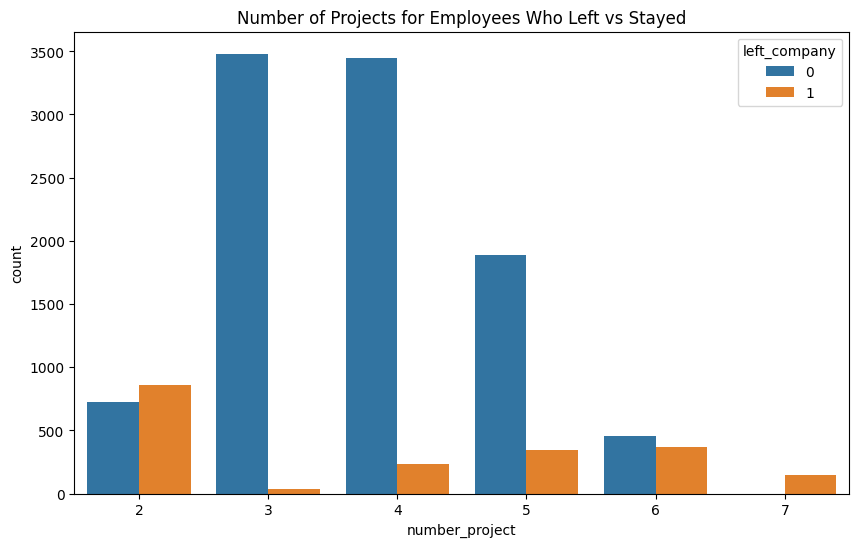

In [64]:
# Create a plot as needed
# 5. Project count distribution for employees who left vs stayed
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_project', hue='left_company')
plt.title('Number of Projects for Employees Who Left vs Stayed')
plt.show()

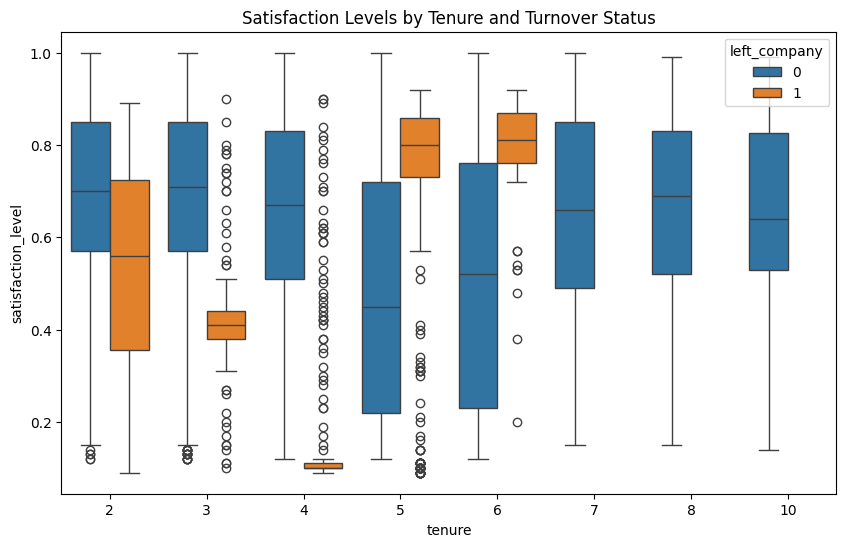

In [65]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tenure', y='satisfaction_level', hue='left_company')
plt.title('Satisfaction Levels by Tenure and Turnover Status')
plt.show()

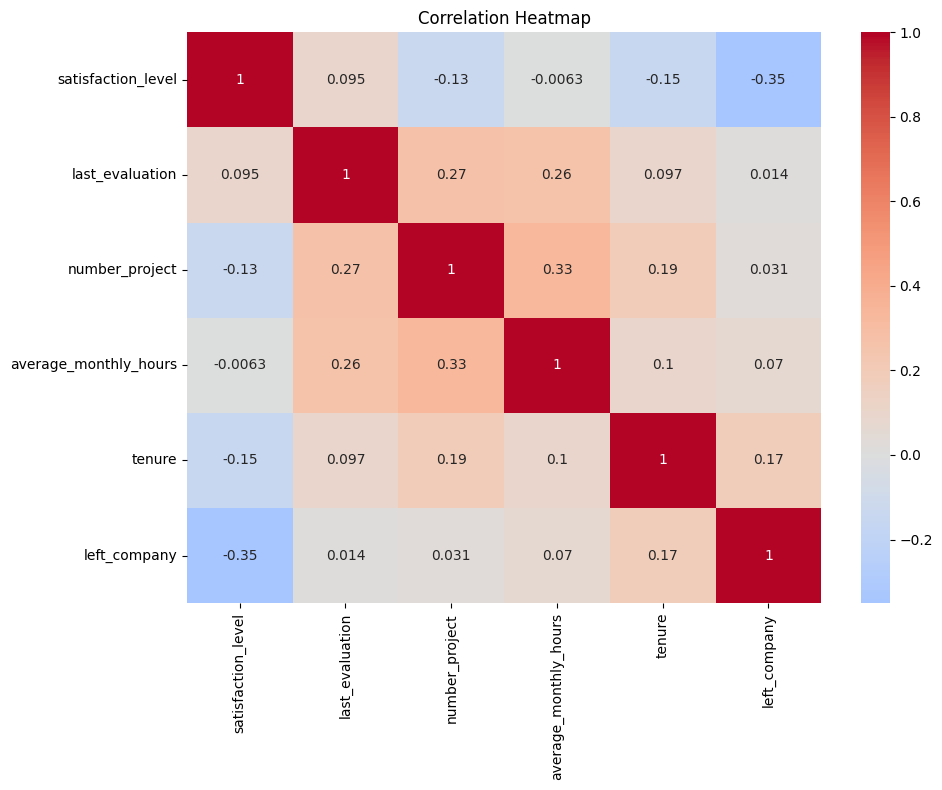

In [66]:
# Create a plot as needed
# 7. Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                 'average_monthly_hours', 'tenure', 'left_company']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

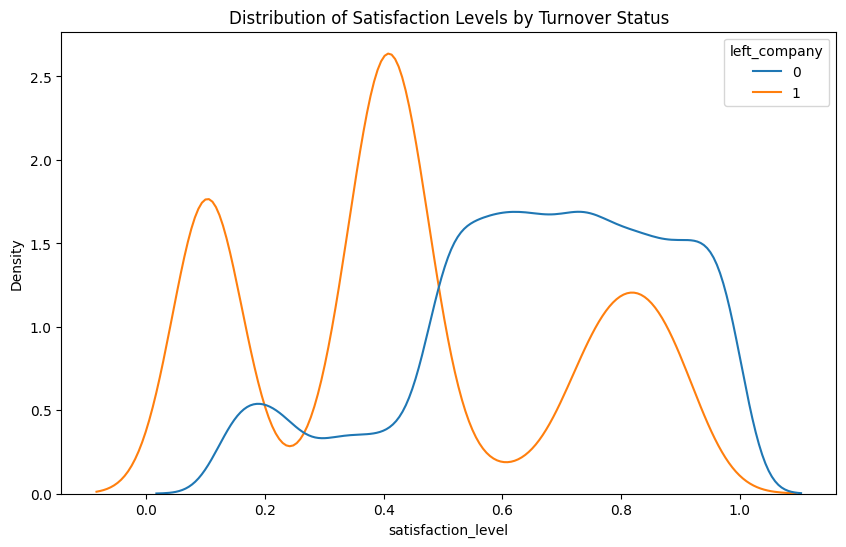

In [67]:
# Create a plot as needed
# 8. Distribution of satisfaction levels by turnover status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='satisfaction_level', hue='left_company', common_norm=False)
plt.title('Distribution of Satisfaction Levels by Turnover Status')
plt.show()

### Insights

In [68]:
df['left_company'].value_counts(normalize=True) * 100

left_company
0    83.39588
1    16.60412
Name: proportion, dtype: float64

Key insights from the exploratory data analysis:

1. Turnover Rate
- Approximately 16.67% of employees left the company
- This is a relatively high turnover rate in the industry that warrants investigation.

2. Satisfaction and Evaluation Patterns
- Employees who left show distinct clustering in satisfaction levels
- There appears to be a group of high-performing but unsatisfied employees who left
- Another cluster shows low satisfaction and low evaluation scores

3. Working Hours and Projects
- Employees who left were often working either significantly more than average
- Those with 6 or 7 projects show higher turnover rates
- Overwork might be a factor in employee departures

4. Department and Salary Insights
- Some departments show notably higher turnover rates
- Lower salary levels correlate with higher turnover rates
- The effect of salary appears more pronounced in certain departments

5. Tenure Patterns
- Employees with 3-4 years tenure show higher turnover rates
- Very low and very high tenure employees tend to stay longer
- Satisfaction levels vary significantly with tenure

6. Key Risk Factors
- High number of projects (6+)
- Low satisfaction despite high evaluation scores
- Extended working hours
- Lower salary levels
- Lack of promotion over long tenure

These insights suggest that workload, compensation, and career development opportunities are key areas to address in retention strategies.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

This is a binary classification task where we need to predict whether an employee will leave the company (1) or stay (0). The target variable 'left_company' has two possible outcomes, making this a supervised binary classification problem.

### Identify the types of models most appropriate for this task.

Several models would be appropriate for this binary classification task:

1. Logistic Regression 
   - Good baseline model
   - Highly interpretable
   - Can provide feature importance through coefficients

2. Random Forest Classifier
   - Can capture non-linear relationships
   - Handles mixed data types well
   - Provides feature importance
   - Less prone to overfitting than single decision trees

## Logistic Regression

In [69]:
# Prepare features and target
X = df.drop('left_company', axis=1)
y = df['left_company']

In [70]:
# Create dummy variables for categorical columns
X = pd.get_dummies(X, columns=['department', 'salary'])

In [71]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
# Scale the numerical features
# Use StandardScaler because several of numerical features like 'satisfaction_level' and 'last_evaluation' are already on a 0-1 scale
# 'average_monthly_hours' and 'number_project' show roughly normal distributions.
# For logistic regression, the StandardScaler makes the convergence of gradient descent faster.
# Features on very different scales can cause the model to place too much emphasis on features with larger values.

scaler = StandardScaler()
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                 'average_monthly_hours', 'tenure']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [73]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
# Make predictions
lr_pred = lr_model.predict(X_test)
lr_pred_prob = lr_model.predict_proba(X_test)[:, 1]

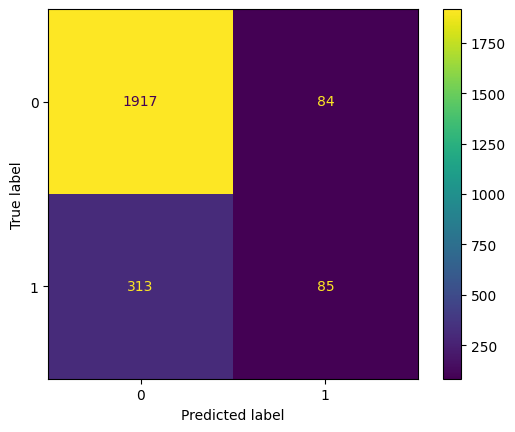

In [75]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, lr_pred, labels=lr_model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=lr_model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [76]:
# Print model evaluation metrics
print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.50      0.21      0.30       398

    accuracy                           0.83      2399
   macro avg       0.68      0.59      0.60      2399
weighted avg       0.80      0.83      0.81      2399



For Class 0 (Employees who stayed):

Precision: 0.86
Out of all employees our model predicted would stay, 85% actually stayed
Formula: True Negatives / (True Negatives + False Negatives)
Intuition: How accurate we are when we predict someone will stay

Recall: 0.96
Of all employees who actually stayed, our model correctly identified 96% of them
Formula: True Negatives / (True Negatives + False Positives)
Intuition: How good we are at finding all employees who stayed

F1-score: 0.91
Harmonic mean of precision and recall for the "stayed" class
Good balance between precision and recall for staying employees

For Class 1 (Employees who left):

Precision: 0.50
When we predict an employee will leave, we're right 51% of the time
Formula: True Positives / (True Positives + False Positives)
Intuition: When we raise an alert about potential turnover, we're right about half the time


Recall: 0.21
Of all employees who actually left, we only identified 18% of them
Formula: True Positives / (True Positives + False Negatives)
Intuition: We're missing 82% of employees who end up leaving


F1-score: 0.30
Low F1-score indicates poor overall performance in predicting leavers
Model is much weaker at identifying employees who will leave

Overall:

Model is better at identifying employees who will stay (Class 0) than those who will leave (Class 1)
High recall for Class 0 (0.96) but low recall for Class 1 (0.21) suggests the model is biased toward predicting "stay"
This could be due to class imbalance in our dataset (more employees stayed than left)
To improve predictions for employees leaving, we might need to:

Address class imbalance (e.g., using class weights or SMOTE)
Add more relevant features
Try different modeling approaches

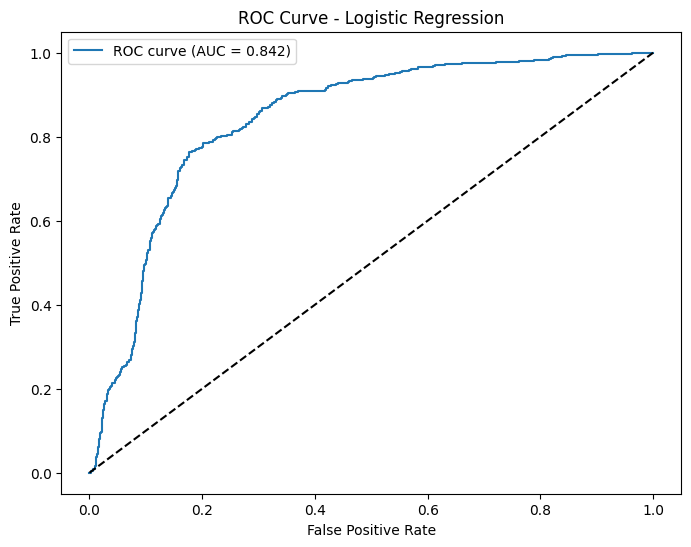

In [77]:
# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, lr_pred_prob)
auc = roc_auc_score(y_test, lr_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

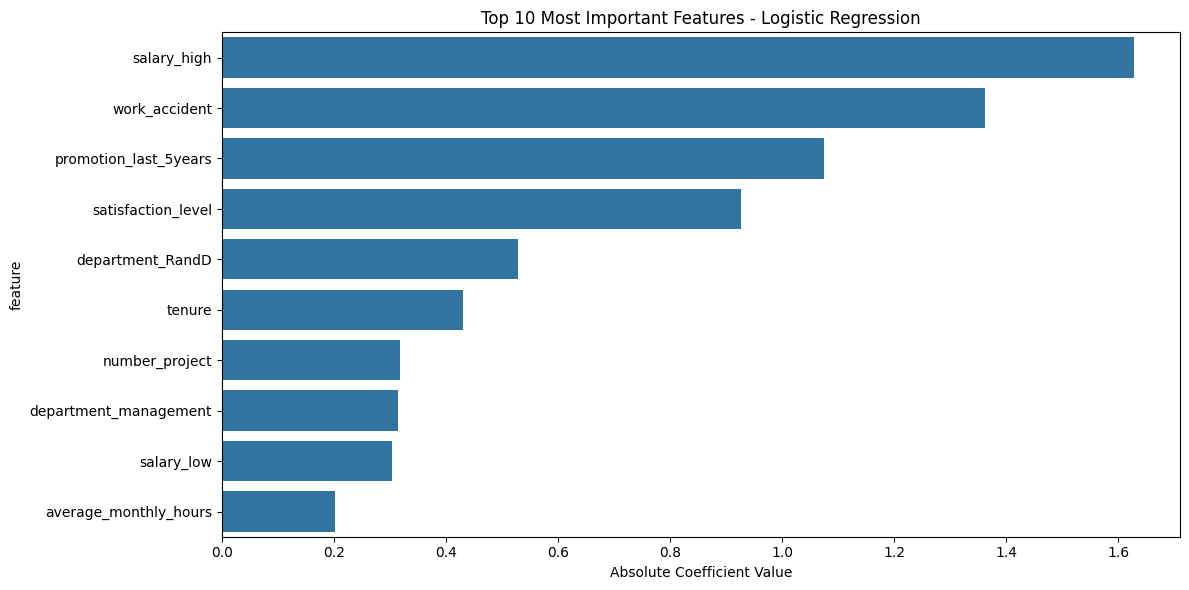

In [78]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

## Random Forest

In [79]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [80]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
# Uncommment if training is needed
# rf1.fit(X_train, y_train)

CPU times: total: 15min 54s
Wall time: 15min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [82]:
# Define a path to the folder where you want to save the model
path = './pickle_files/'

In [83]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [84]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [85]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [86]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [87]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9809631858096731)

In [88]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

Print the evaluation scores on the training set for random forest models.

In [89]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision    recall       F1  accuracy       auc
0  random forest cv   0.947094  0.908339  0.92726  0.976334  0.980963


Random Forest scores are all over 90% for the positive class (employee leave the company) -- much better than Logsitics Regression scores.

In [90]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

#### Prediction on test data

In [91]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)

# Scores comparison between cross-validation and test data
print(rf1_cv_results)
print(rf1_test_scores)

              model  precision    recall       F1  accuracy       auc
0  random forest cv   0.947094  0.908339  0.92726  0.976334  0.980963
                 model  precision    recall        f1  accuracy      AUC
0  random forest1 test   0.946154  0.927136  0.936548  0.979158  0.95832


The test scores are very similar to the validation scores, this appears to be a strong model. Since this test set was only used for this model, the model's performance on this data is representative of how it will perform on new, unseeen data.

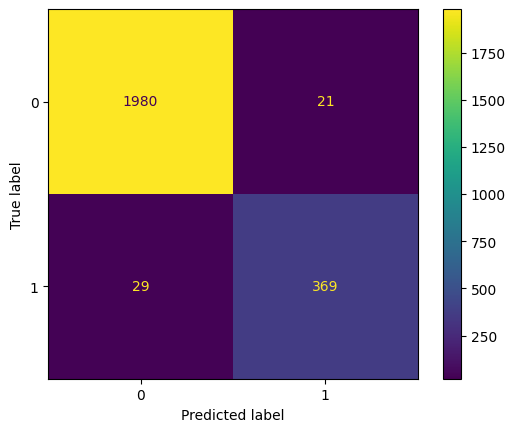

In [92]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='');

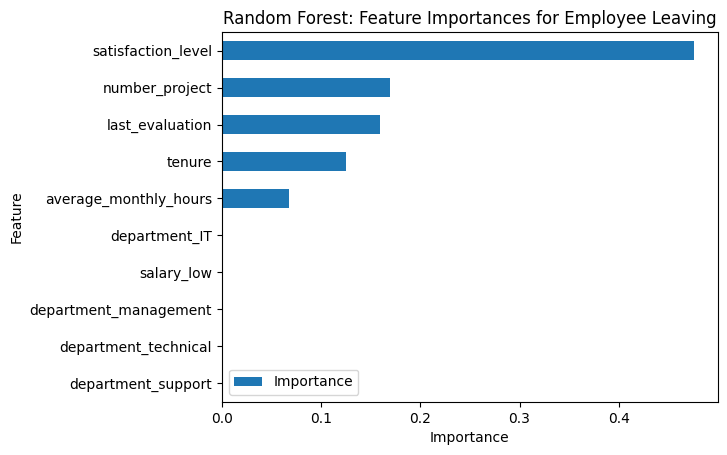

In [94]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

#### Key insights of the models:

    - Employee satisfaction is the strongest predictor of turnover.
    - Work-related factors (tenure, project load, hours) significantly impact retention.
    - Department and salary level have moderate influence on turnover.
    - Performance evaluations correlate with turnover decisions.

#### Business recommendations:
Immediate Actions:
- Implement regular satisfaction surveys and feedback sessions.
- Review workload distribution for employees with multiple projects.
- Develop clear career progression paths based on tenure milestones.

Policy Changes:
- Establish workload limits (number of concurrent projects).
- Create structured promotion and salary review cycles.
- Implement work-life balance initiatives to manage monthly hours.

Department-Specific:
- Most of departments have high turnover rates.
- Review salary structures, particularly for high-risk departments.